# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url_path ="/content/drive/MyDrive/Superstore Marketing Data - Sheet1.csv"
df = pd.read_csv(url_path)
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [6]:
# Drop unneccesary column from database
df.drop(['Kidhome','Teenhome','Dt_Customer'], axis=1)
df.drop('Id',axis=1)
df.head()
# convert Year_Birth into age taking year on enrollment 2014
df['Age'] = 2014 - df['Year_Birth']
df.head()
df.isnull().sum()
df.shape
# null values present in only 24 incomes, drop null income rows
df.dropna(subset=['Income'], inplace=True)
df.shape
df.head()
# Data is cleaned now, null values and unnecessary column removed


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,44
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,53
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,56
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,1,1,0,2,7,0,0,47
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,0,34,2,3,1,2,7,1,0,25


In [ ]:
# find the average income, average age and average spent on different items
print("Average Income",df['Income'].mean())
print("Average Age",df['Age'].mean())
print("Average wine spent",df['MntWines'].mean())
print("Average fish spent",df['MntFishProducts'].mean())
print("Average Meat spent",df['MntMeatProducts'].mean())
print("Average Sweet spent",df['MntSweetProducts'].mean())
print("Average Gold spent",df['MntGoldProds'].mean())
print("Average fruit spent",df['MntFruits'].mean())


Average Income 52247.25135379061
Average Age 45.17960288808664
Average wine spent 305.09160649819495
Average fish spent 37.63763537906137
Average Meat spent 166.99593862815885
Average Sweet spent 27.028880866425993
Average Gold spent 43.96525270758123
Average fruit spent 26.356046931407942


Highest spent on wine by the customers and lowest on fruits, Average age is 45 and average income is 52247.

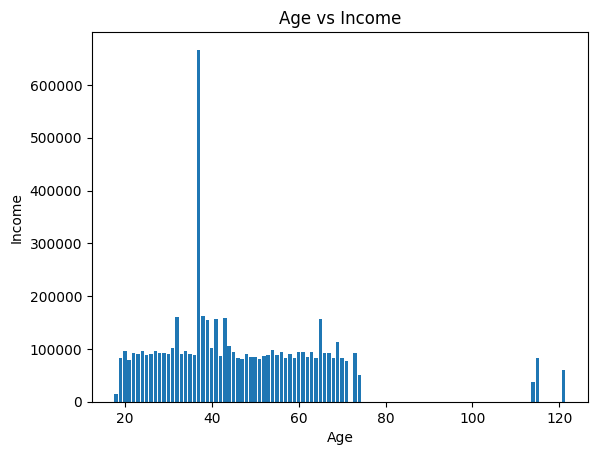

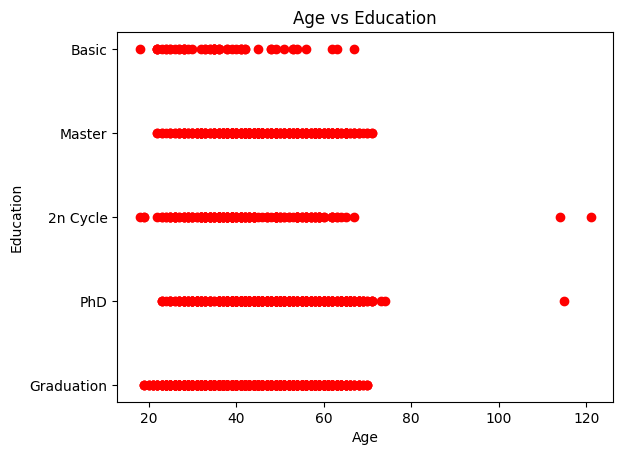

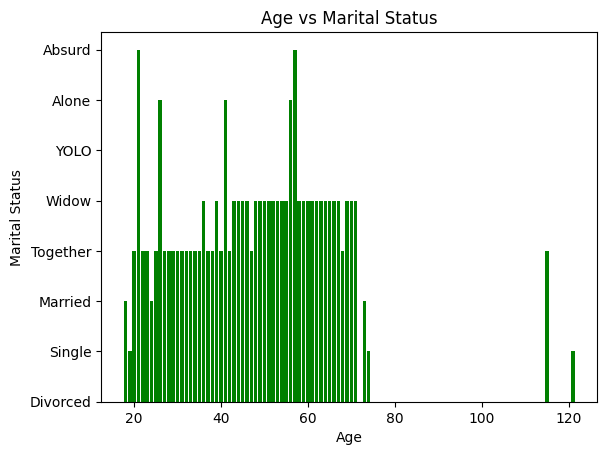

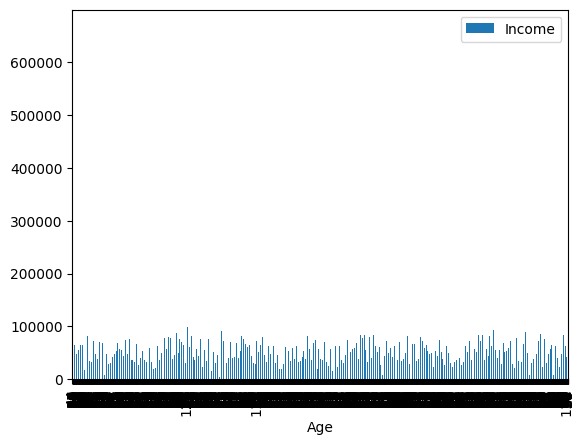

In [7]:
plt.bar(df['Age'],df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')
plt.show()
plt.scatter(df['Age'],df['Education'],color="red")
plt.xlabel('Age')
plt.ylabel('Education')
plt.title('Age vs Education')
plt.show()
plt.bar(df['Age'],df['Marital_Status'],color="green")
plt.xlabel('Age')
plt.ylabel('Marital Status')
plt.title('Age vs Marital Status')
plt.show()
df.plot(x='Age',y=['Income','Marital_Status'],kind='bar')
plt.show()


The above graph reflect following outcomes


*   Age 20 to 60 having average income till 100000 and very less people income from 100000 to 600000 in this age group. Very less people exist more than 70 year of age.
*   Most of people betweeen 20 and 70 done graduation and masters, Phd and 2nd cycle done by most of people between 20 and 80. No education between 80 and 110.Less people done basics between 20 and 70.
*   About equal number of people Divorced, single, married and together in age 20 to 73, most of the widow from 40 to 73. There are very few people exist more than 70.






##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
print("Average Income",df['Income'].mean())
print("Average Age",df['Age'].mean())
print("Average wine spent",df['MntWines'].mean())
print("Average fish spent",df['MntFishProducts'].mean())
print("Average Meat spent",df['MntMeatProducts'].mean())
print("Average Sweet spent",df['MntSweetProducts'].mean())
print("Average Gold spent",df['MntGoldProds'].mean())
print("Average fruit spent",df['MntFruits'].mean())
print("Variance age",df['Age'].var())
print("Variance of Income",df['Income'].var())
print("Variance of wine",df['MntWines'].var())
print("Variance of fish",df['MntFishProducts'].var())
print("Variance of Meat",df['MntMeatProducts'].var())
print("Variance of Sweet",df['MntSweetProducts'].var())
print("Variance of Gold",df['MntGoldProds'].var())
print("Variance of fruit",df['MntFruits'].var())
print("Standard deviation of income",df['Income'].std())
print("Standard deviation of age",df['Age'].std())
print("Standard deviation of wine",df['MntWines'].std())
print("Standard deviation of fish",df['MntFishProducts'].std())
print("Standard deviation of Meat",df['MntMeatProducts'].std())
print("Standard deviation of Sweet",df['MntSweetProducts'].std())
print("Standard deviation of Gold",df['MntGoldProds'].std())
print("Standard deviation of fruit",df['MntFruits'].std())

Average Income 52247.25135379061
Average Age 45.17960288808664
Average wine spent 305.09160649819495
Average fish spent 37.63763537906137
Average Meat spent 166.99593862815885
Average Sweet spent 27.028880866425993
Average Gold spent 43.96525270758123
Average fruit spent 26.356046931407942
Variance age 143.65350702056043
Variance of Income 633683788.5756187
Variance of wine 113790.12569023953
Variance of fish 2997.7905287627204
Variance of Meat 50302.98643947972
Variance of Sweet 1686.91293527068
Variance of Gold 2684.8371667983984
Variance of fruit 1583.555791860551
Standard deviation of income 25173.0766609014
Standard deviation of age 11.98555409735238
Standard deviation of wine 337.3279201166715
Standard deviation of fish 54.75208241485177
Standard deviation of Meat 224.28327275898155
Standard deviation of Sweet 41.072045666982305
Standard deviation of Gold 51.815414374473534
Standard deviation of fruit 39.7939165182387


The above calculation show that very high variation in above database.
There is about 25000 deviation from mean in income, 12 year of age deviation, very high deviation in spent on wine about 337 that is equal to average spent, fist spent very high deviation 55, huge deviation in meat and sweet, high deviation in gold and fruits.

Number of outliers: 3


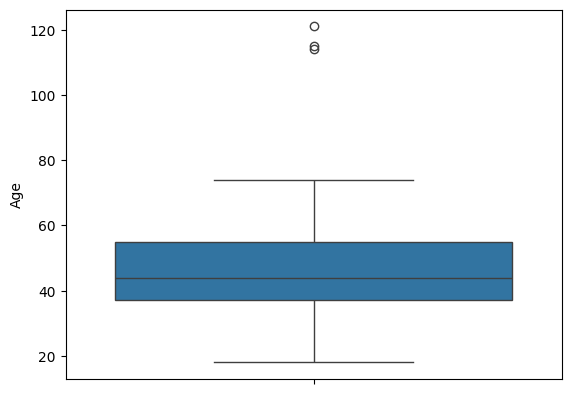

Number of outliers: 8


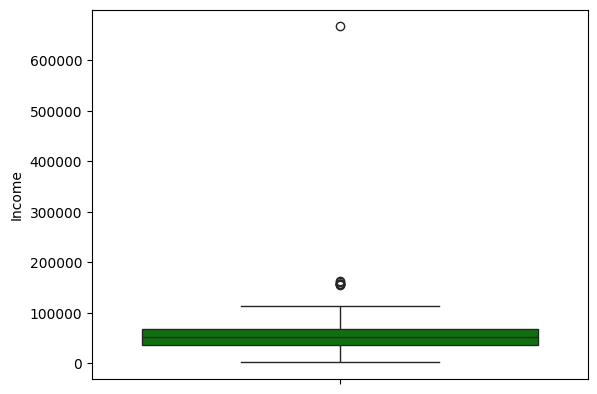

Number of outliers: 15


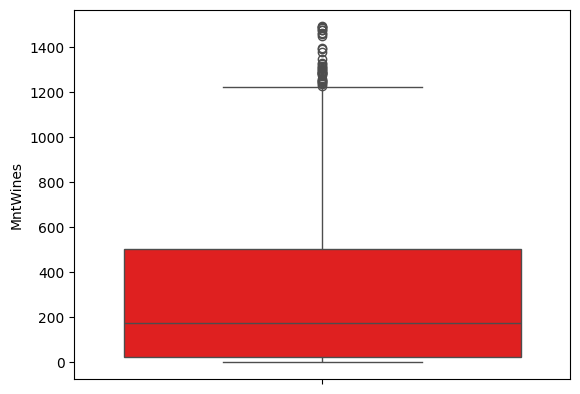

In [ ]:
# find outlier by Z score method
from scipy import stats
z_score = stats.zscore(df['Age'])
outliers=np.abs(z_score)>3
print("Number of outliers:",len(df[outliers]))
sns.boxplot(df['Age'])
plt.show()
Zscore_income=stats.zscore(df['Income'])
outliers=np.abs(Zscore_income)>3
print("Number of outliers:",len(df[outliers]))
sns.boxplot(df['Income'],color='g')
plt.show()
Zscore_wine=stats.zscore(df['MntWines'])
outliers=np.abs(Zscore_wine)>3
print("Number of outliers:",len(df[outliers]))
sns.boxplot(df['MntWines'],color='r')
plt.show()

The above outlier study show that higher the deviation from mean higher the outliers.

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

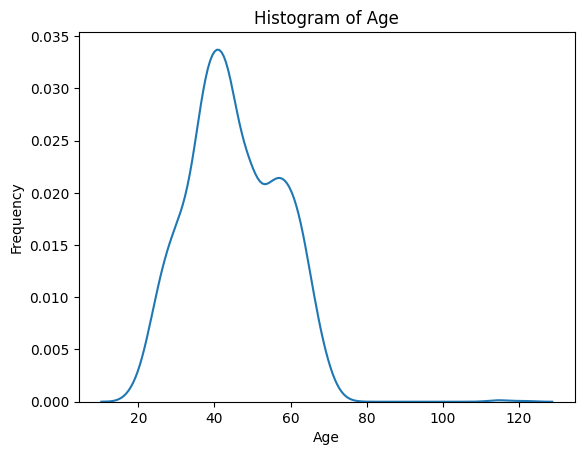

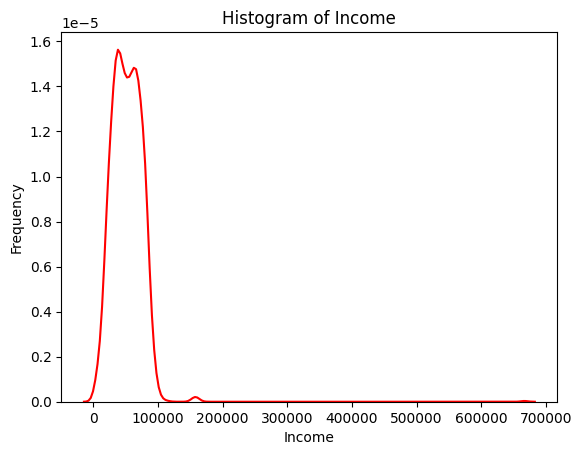

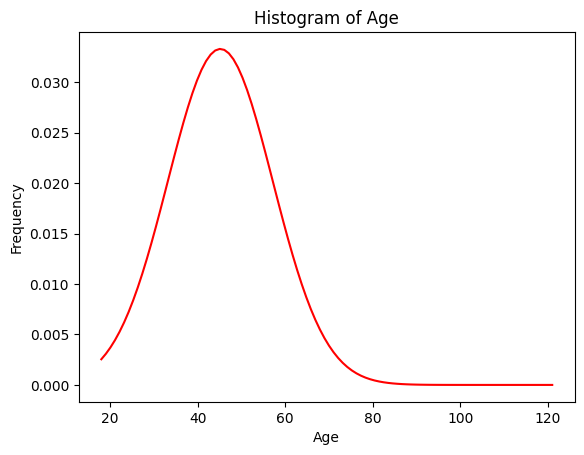

KS Statistic: 1.0
P-value: 0.0
KS Statistic: 1.0
P-value: 0.0
KS Statistic: 1.0
P-value: 0.0


In [ ]:
# plot age data
import scipy.stats as stats
from scipy.stats import norm
sns.kdeplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()
# plot income data
sns.kdeplot(df['Income'],color='r')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()
mu, std = stats.norm.fit(df['Age'])
x = np.linspace(min(df['Age']), max(df['Age']), 100)
pdf=stats.norm.pdf(x,mu,std)
plt.plot(x,pdf,color='r')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()
# Use ks test to find p value
from scipy.stats import kstest
ks_statistic, p_value = kstest(df['Age'], 'norm')
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)
ks_statistic,p_value=kstest(df['Income'],'norm')
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)
# p value after removing outliers
filter_age = df['Age'][(df['Age']>20) & (df['Age']<65)]
ks_statistic,p_value=kstest(filter_age,'norm')
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

The above age and income chart provide information that they are normally distributed if exclude some extreme outliers.

Expected value of age 45.17960288808664
Expected value of income 52247.25135379061


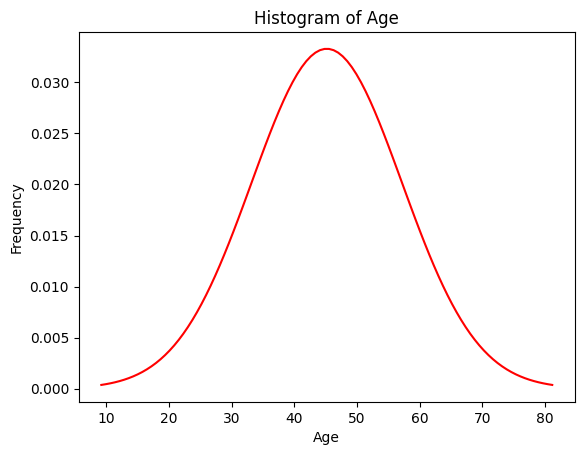

Probability density for age 45 is 0.03328903302264701
CDF between 40 and 60 age 0.5591400965946024


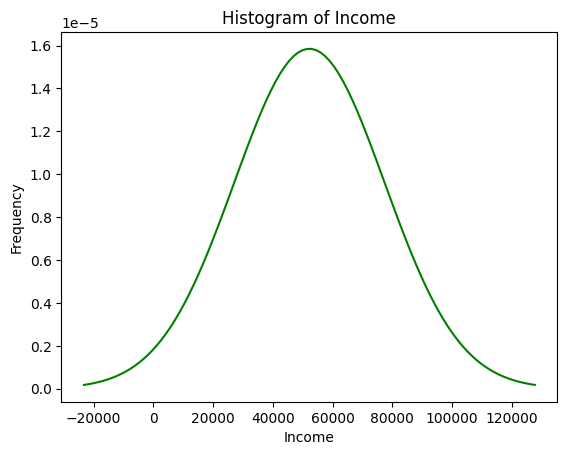

Probability density for income 50000 is 1.578848451229641e-05
Cumulative density of income between 40000 and 50000: 0.1511651618028299


In [ ]:
# Find expected value and probability of Age and Income
Ex_age=df['Age'].mean()
Ex_income=df['Income'].mean()
print("Expected value of age",Ex_age)
print("Expected value of income",Ex_income)
# find PDF around mean in both cases
mu,std= stats.norm.fit(df['Age'])
x=np.linspace(mu-3*std,mu+3*std,100)
pdf=stats.norm.pdf(x,mu,std)
plt.plot(x,pdf,color='r')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()
print("Probability density for age 45 is",stats.norm.pdf(45,mu,std))
# CDF between 40 and 60 age
print("CDF between 40 and 60 age",stats.norm.cdf(60,mu,std)-stats.norm.cdf(40,mu,std))
mu,std=stats.norm.fit(df['Income'])
x = np.linspace(mu-3*std,mu+3*std,100)
pdf=stats.norm.pdf(x,mu,std)
plt.plot(x,pdf,color='g')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()
print("Probability density for income 50000 is",stats.norm.pdf(50000,mu,std))
print("Cumulative density of income between 40000 and 50000:",stats.norm.cdf(50000,mu,std)-stats.norm.cdf(40000,mu,std))


The above probability density function around the mean of age and income show that maximum age frequency and maximum income frequency lies aroung mean or expected value. Maximum age lies between 34 to 60 and maximum income lies between 25000 to 77000.

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

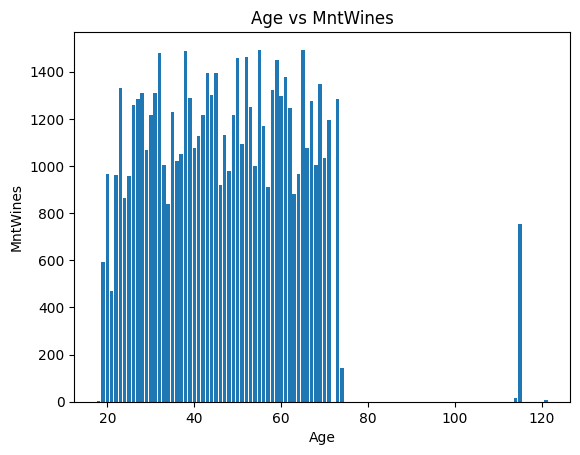

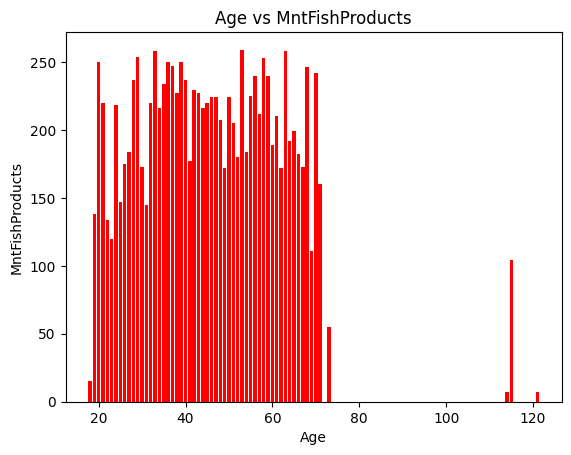

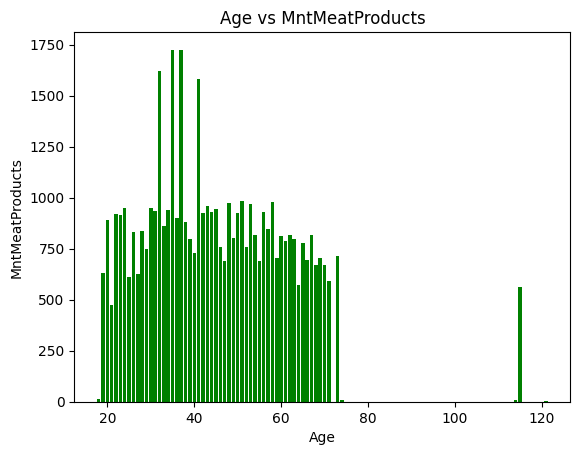

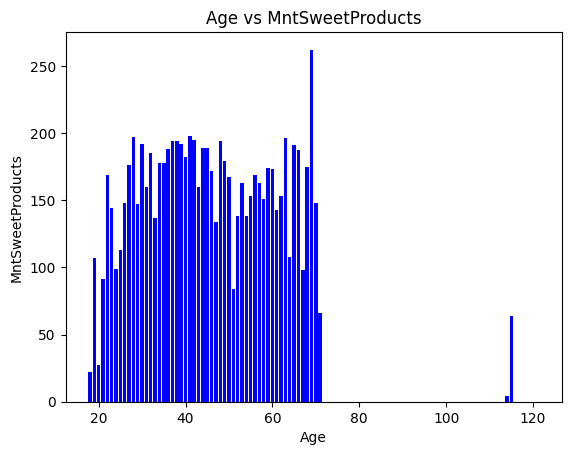

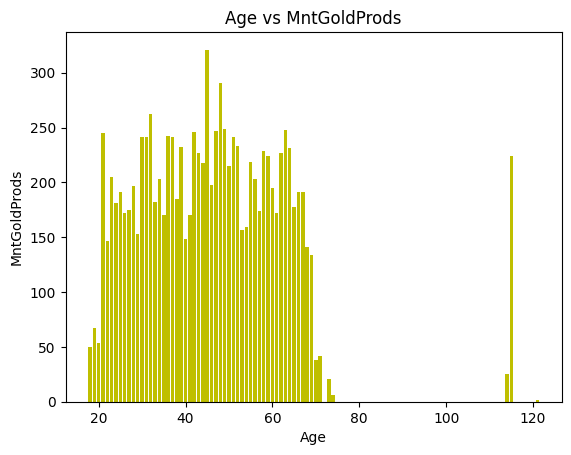

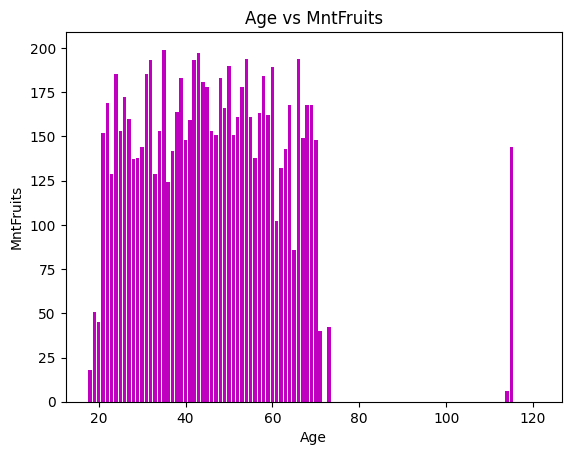

In [ ]:
plt.bar(df['Age'],df['MntWines'])
plt.xlabel('Age')
plt.ylabel('MntWines')
plt.title('Age vs MntWines')
plt.show()
plt.bar(df['Age'],df['MntFishProducts'],color='r')
plt.xlabel('Age')
plt.ylabel('MntFishProducts')
plt.title('Age vs MntFishProducts')
plt.show()
plt.bar(df['Age'],df['MntMeatProducts'],color='g')
plt.xlabel('Age')
plt.ylabel('MntMeatProducts')
plt.title('Age vs MntMeatProducts')
plt.show()
plt.bar(df['Age'],df['MntSweetProducts'],color='b')
plt.xlabel('Age')
plt.ylabel('MntSweetProducts')
plt.title('Age vs MntSweetProducts')
plt.show()
plt.bar(df['Age'],df['MntGoldProds'],color='y')
plt.xlabel('Age')
plt.ylabel('MntGoldProds')
plt.title('Age vs MntGoldProds')
plt.show()
plt.bar(df['Age'],df['MntFruits'],color='m')
plt.xlabel('Age')
plt.ylabel('MntFruits')
plt.title('Age vs MntFruits')
plt.show()



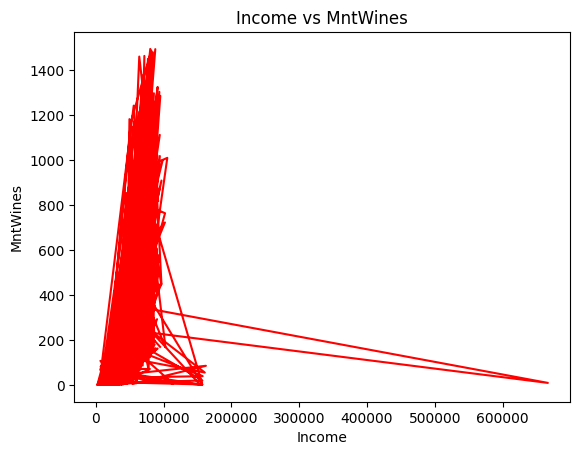

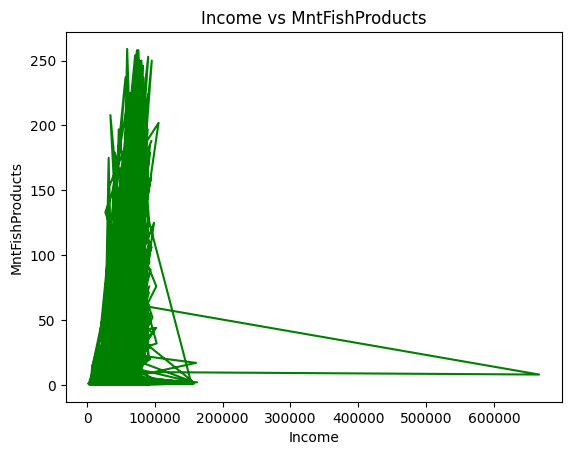

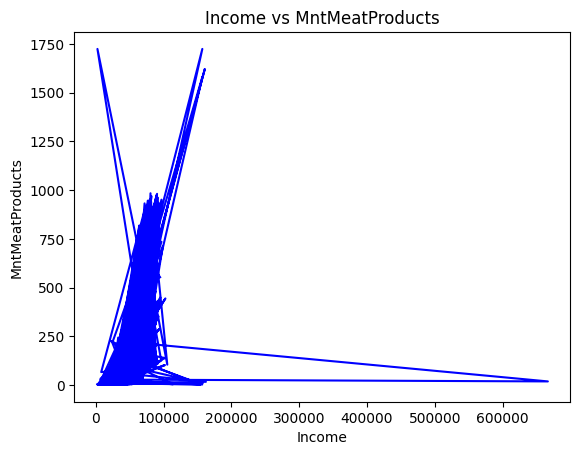

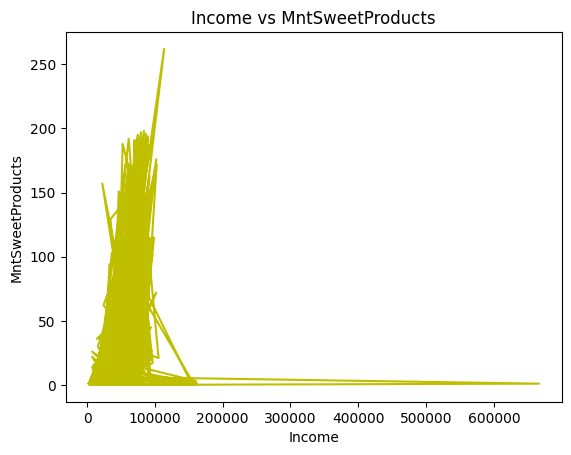

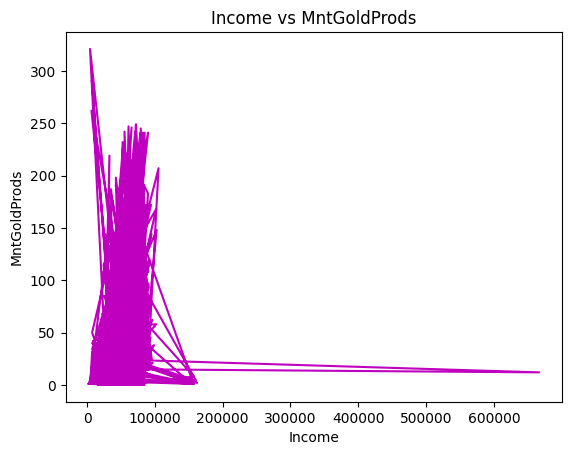

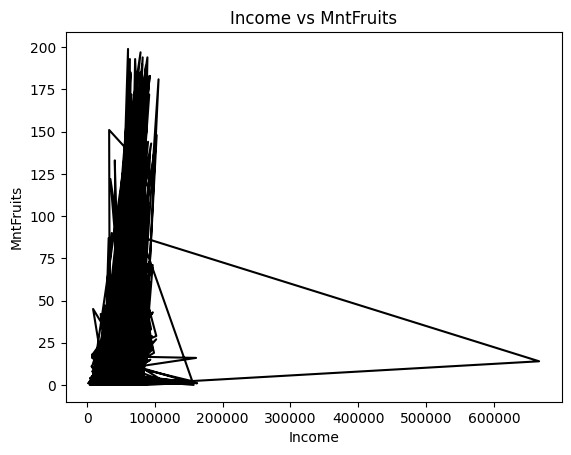

In [ ]:
plt.plot(df['Income'],df['MntWines'],color='r')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('Income vs MntWines')
plt.show()
plt.plot(df['Income'],df['MntFishProducts'],color='g')
plt.xlabel('Income')
plt.ylabel('MntFishProducts')
plt.title('Income vs MntFishProducts')
plt.show()
plt.plot(df['Income'],df['MntMeatProducts'],color='b')
plt.xlabel('Income')
plt.ylabel('MntMeatProducts')
plt.title('Income vs MntMeatProducts')
plt.show()
plt.plot(df['Income'],df['MntSweetProducts'],color='y')
plt.xlabel('Income')
plt.ylabel('MntSweetProducts')
plt.title('Income vs MntSweetProducts')
plt.show()
plt.plot(df['Income'],df['MntGoldProds'],color='m')
plt.xlabel('Income')
plt.ylabel('MntGoldProds')
plt.title('Income vs MntGoldProds')
plt.show()
plt.plot(df['Income'],df['MntFruits'],color='k')
plt.xlabel('Income')
plt.ylabel('MntFruits')
plt.title('Income vs MntFruits')
plt.show()

With above line plot we conclude that most of the people income lies in 0 to 90000 level, Most of people in this income group spend on wines and least on fruits.

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

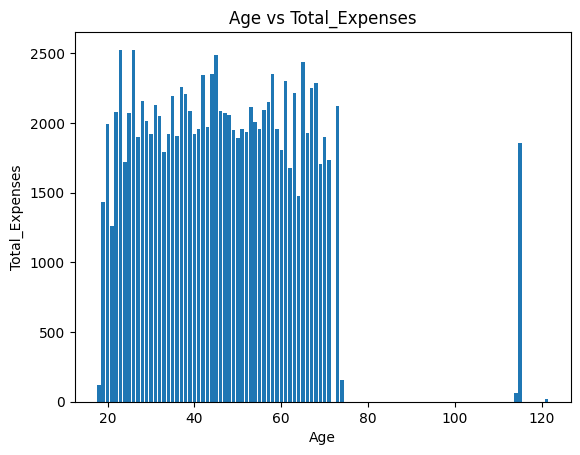

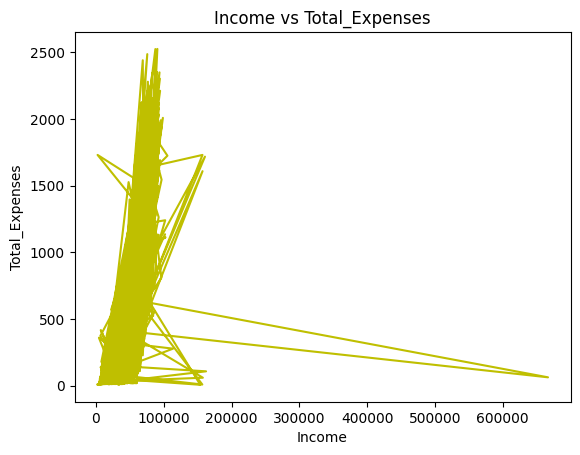

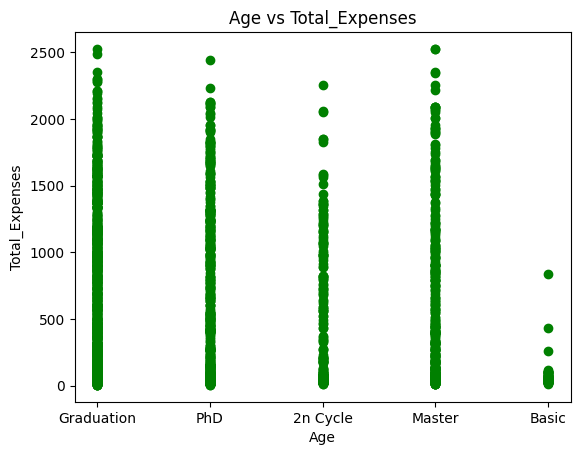

In [19]:
# lets obtain total expenses and compare that with age,income and education
df['Total_Expenses']=df['MntWines']+df['MntFishProducts']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntGoldProds']+df['MntFruits']
df.head()
plt.bar(df['Age'],df['Total_Expenses'])
plt.xlabel('Age')
plt.ylabel('Total_Expenses')
plt.title('Age vs Total_Expenses')
plt.show()
plt.plot(df['Income'],df['Total_Expenses'],color='y')
plt.xlabel('Income')
plt.ylabel('Total_Expenses')
plt.title('Income vs Total_Expenses')
plt.show()
plt.scatter(df['Education'],df['Total_Expenses'],color='g')
plt.xlabel('Age')
plt.ylabel('Total_Expenses')
plt.title('Age vs Total_Expenses')
plt.show()

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

Conclusions and recommendations:
First we discuss conclusion that are following:
1.   The age of maximum people lies between 34 to 60 that is calculated through mean and standard deviation difference.
2.   Maximum income of people lies between 25000 to 77000.
3.   Maximum spent of wines, next on meat products, then on gold products, followed by fish products,sweet and least spent on fruits if we observe age as well as income wise data.
4. After observing educationwise data we found that maxiumum expenses by graduate then master and phd, least by having basic education.

Recommendations are following:

1.   To enhance the business company should focus on the client that age lies between 34 to 60 as maximum population lies in this range.
2.   Company should focus on people that having income in range 25000 to 77000.
3. Educationwise companies should target graduate, master and phd holders.
4. Maximum spent on wine and meat so companies can increase income to increase price of these items with little value addition.
5. Companies should also focus to increase the sales of least selling producs like sweet and fruits. Regardind sweet there are some health concern but fruits sales or fruits by products sales can be increase to spread health benefits of fruits. By this companies can increase their revenue.






## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍